In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import cv2
import os

In [2]:
img = image.load_img("basedata/training/happy/7.png")

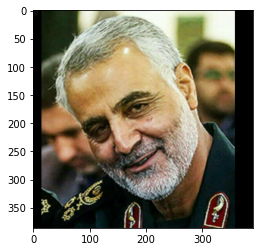

In [3]:
plt.imshow(img)

In [6]:
cv2.imread("basedata/training/happy/3.png").shape

(553, 570, 3)

In [7]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [8]:
train_dataset = train.flow_from_directory('basedata/training/',
                                        target_size= (200,200),
                                        batch_size= 3 ,
                                        class_mode= 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                          target_size= (200,200),
                                          batch_size= 3 ,
                                          class_mode= 'binary')

Found 40 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu' ,input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [12]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 615ms/step - loss: 19.0258 - accuracy: 0.7143 - val_loss: 6.1287 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 385ms/step - loss: 2.3132 - accuracy: 0.7143 - val_loss: 1.0285 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 428ms/step - loss: 2.3857 - accuracy: 0.4444 - val_loss: 0.6466 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 1s 401ms/step - loss: 0.7009 - accuracy: 0.6667 - val_loss: 0.7003 - val_accuracy: 0.5714
Epoch 5/30
3/3 [==============================] - 1s 403ms/step - loss: 0.5856 - accuracy: 0.5556 - val_loss: 0.6314 - val_accuracy: 0.5714
Epoch 6/30
3/3 [==============================] - 1s 398ms/step - loss: 2.2157 - accuracy: 0.5556 - val_loss: 1.2789 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 1s 433ms/step - loss: 0.6425 - accuracy: 0.8571 - val_loss: 1.5608 - val_accuracy: 0.5000
Epoch 8/30
3/3 [===

In [14]:
validation_dataset.class_indices

{'happy': 0, 'not_happy': 1}

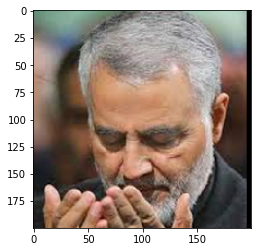

you are not happy


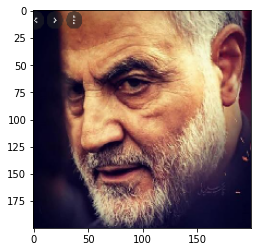

you are not happy


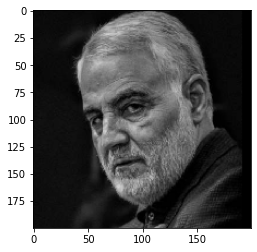

you are not happy


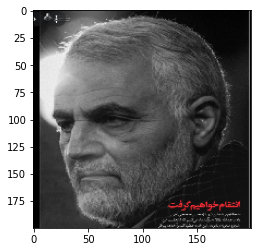

you are happy


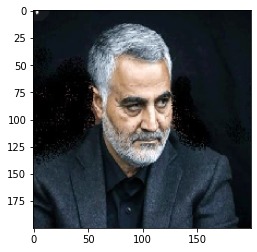

you are not happy


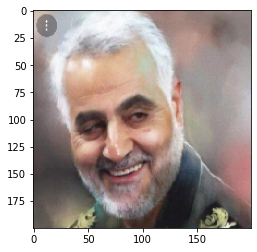

you are happy


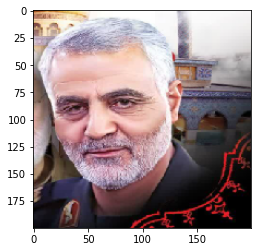

you are happy


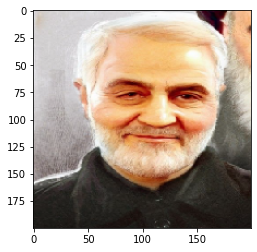

you are not happy


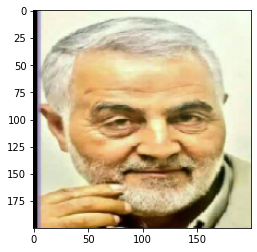

you are happy


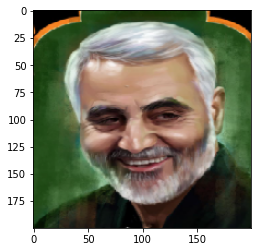

you are happy


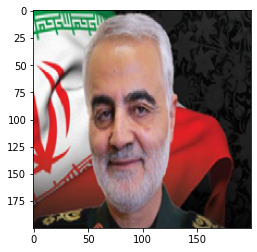

you are happy


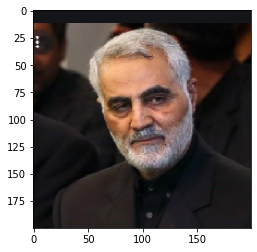

you are not happy


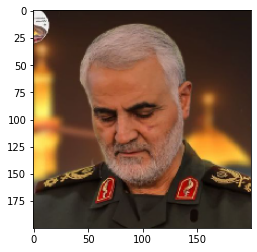

you are not happy


In [15]:
dir_path = 'basedata/testing'

for i in os.listdir(dir_path):
          # print(i)
    img = image.load_img(dir_path + '//' + i , target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 1:
         print("you are not happy")
    else:
         print("you are happy")
